### cross correlation analysis for time-series delay


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
# Importing data from the finalized data set
df1=pd.read_excel('smooth_interp.xlsx',header=0,index_col=0)
df1.head()
df1=df1.reset_index()
df= df1.drop('minute',axis=1)
df= df.drop('index',axis=1)
df.head()


tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  103.333893   16.375196   15.160000  529.151917   54.062538  6108.159180   
2  103.808968   16.706270   15.160000  527.527954   43.480278  6085.975586   
3  102.219231   17.050024   15.156041  520.946472   37.862888  6116.854980   
4  102.523087   16.613831   15.150989  520.562073   38.544147  6100.854492   

   Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0      2151.0   40.304512    54.255432     11.241975  0.117296  
1      2155.0   43.349667    54.202900     11.241036  0.117299  
2      2160.0   46.226486    54.150364     11.240097  0.117301  
3      2153.0   38.813515    54.099995     11.239159  0.117303  
4      2162.0   34.497410    54.051334     11.238220  0.117305

In [150]:
df10=pd.read_excel('a4.xlsx',header=0)
df10.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  102.985339   16.029068   15.160000  527.574451   52.672366  6106.514844   
2  103.479516   16.435389   15.160000  527.546553   47.157113  6094.191289   
3  102.723345   16.804170   15.157625  523.586504   41.580578  6107.789504   
4  102.603190   16.689966   15.153643  521.771845   39.758720  6103.628497   

   Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0   2151.0000   40.304512    54.255432     11.241975  0.117296  
1   2153.4000   42.131605    54.223913     11.241412  0.117298  
2   2157.3600   44.588534    54.179783     11.240623  0.117300  
3   2154.7440   41.123522    54.131910     11.239744  0.117302  
4   2159.0976   37.147855    54.083565     11.238830  0.117304

In [151]:
df12=pd.read_excel('a2.xlsx',header=0)
df12.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  103.159616   16.202132   15.160000  528.363184   53.367452  6107.337012   
2  103.679097   16.605443   15.160000  527.695000   45.457713  6090.247871   
3  102.511204   16.961108   15.156833  522.296178   39.381853  6111.533559   
4  102.520710   16.683286   15.152157  520.908894   38.711689  6102.990305   

   Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0   2151.0000   40.304512    54.255432     11.241975  0.117296  
1   2154.2000   42.740636    54.213406     11.241224  0.117298  
2   2158.8400   45.529316    54.162972     11.240322  0.117300  
3   2154.1680   40.156675    54.112590     11.239391  0.117302  
4   2160.4336   35.629263    54.063586     11.238454  0.117305

In [16]:
df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW','BP', 'P', 'SL', 'D', 'CP', 'D50']

# extract the input and output columns as Series objects
x = df[['F', 'FW', 'MS', 'PS', 'SW']].values
y = df[['BP', 'P', 'SL', 'D', 'CP', 'D50']].values

# calculate the cross-correlation between input and output columns
maxlag = 10
ccf = np.zeros((maxlag*2 + 1, x.shape[1], y.shape[1]))
for i in range(x.shape[1]):
    for j in range(y.shape[1]):
        ccf[:, i, j] = np.correlate(x[:, i], y[:, j], mode='full')

# plot the cross-correlation functions
fig, axs = plt.subplots(x.shape[1], y.shape[1], figsize=(10, 5))
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.stem(ccf[:, i, j])
        ax.set_xlabel('Lag')
        ax.set_ylabel('Cross-correlation')
        ax.set_title(f'Cross-correlation between {x.columns[i]} and {y.columns[j]}')
plt.tight_layout()
plt.show()


ValueError: could not broadcast input array from shape (165411,) into shape (21,)

In [153]:
#df=d.copy()
df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW','BP', 'P', 'SL', 'D', 'CP', 'D50']

In [140]:
###Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd

data = df.copy()
# Split into train and test subsets (30% for test)

train, test = train_test_split(data, test_size=1, shuffle=False)


s = StandardScaler() #RobustScaler()
dfs=df.copy()
s_train = s.fit_transform(train)  #whole dataframe ppossilbe


# print('a: ', s.scale_)
# print('Scaler mean')
# print('b: ', s.mean_)


s_test = s.fit_transform(test)


# convert scaled values back to dataframe  
#This is a scaled training and test dataset

s_trained = pd.DataFrame(s_train, columns=train.columns.values,index=train.index) #train index if partial
s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)




#Standard scaler

#s_trained.iloc[40000:].plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
#plt.show()


In [162]:

#df11=s_trained.copy()
# df11=df.copy()
# dfc=(df11-df11.min())/df11.max()

dfc=df.copy()
# extract the input and output columns as Series objects
x = dfc[['F', 'FW', 'MS', 'PS', 'SW']].values
y = dfc[['BP', 'P', 'SL', 'D', 'CP', 'D50']].values

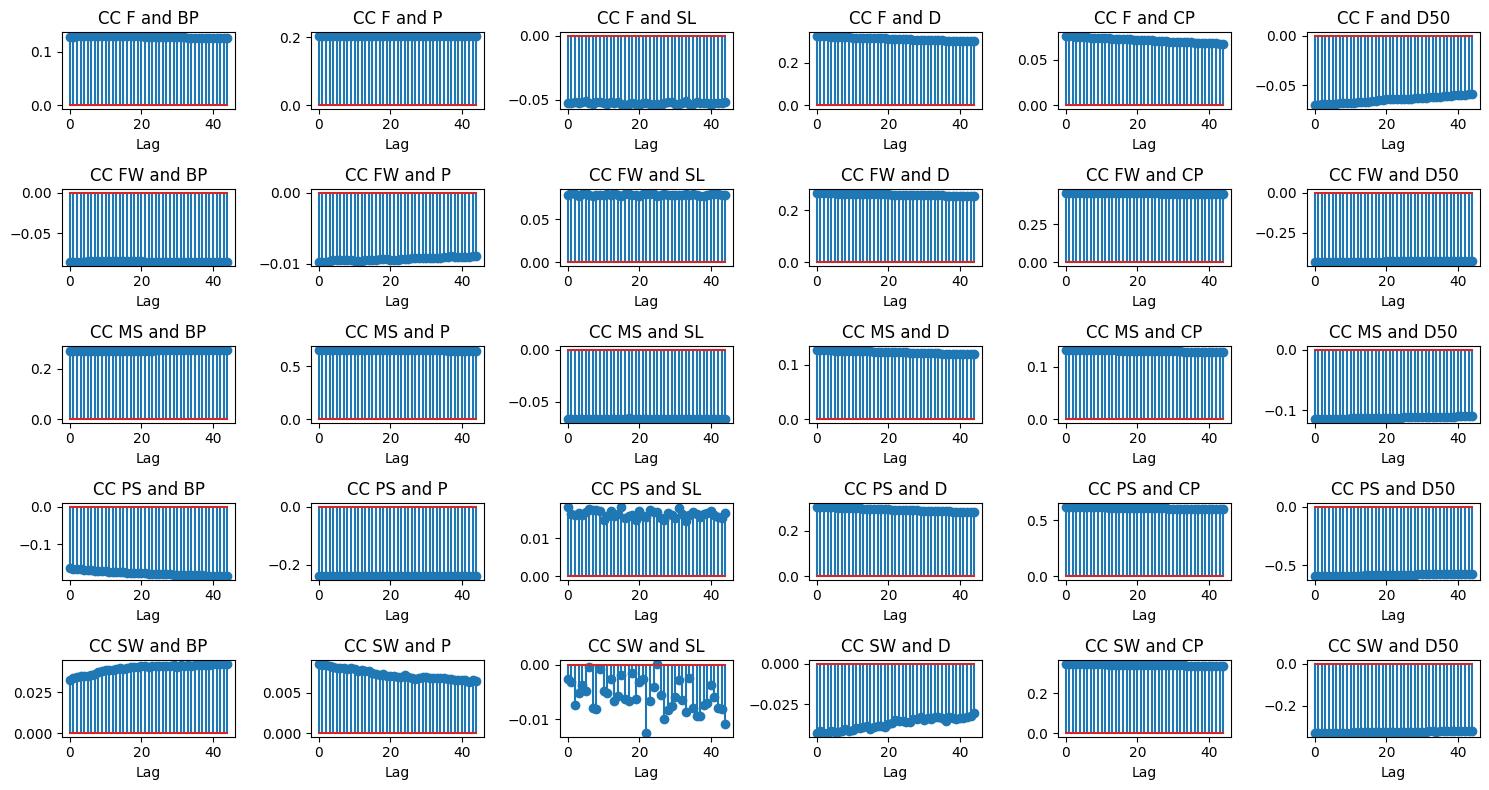

In [163]:
### Cross correlations Plotting!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, correlation_lags

# calculate the cross-correlation between input and output columns
maxlag = 45
ccf = np.zeros((maxlag, x.shape[1], y.shape[1]))
for i in range(x.shape[1]):
    for j in range(y.shape[1]):
           for k in range(maxlag):
            
            ccf[k, i, j] = np.corrcoef(x[:,i], y[:,j])[0,1]
            x[:,i]=np.roll(x[:,i],1)
            



# plot the cross-correlation functions
fig, axs = plt.subplots(x.shape[1], y.shape[1], figsize=(15, 8))

for i, ax_row in enumerate(axs):
    #ax.set_ylabel('Crosscorr')
    for j, ax in enumerate(ax_row):
        
        ax.stem(ccf[:, i, j])
        ax.set_xlabel('Lag')
        ax.set_title(f'CC {df.columns[i]} and {df.columns[j+x.shape[1]]}')
    


plt.tight_layout()
plt.show()



#df to 30
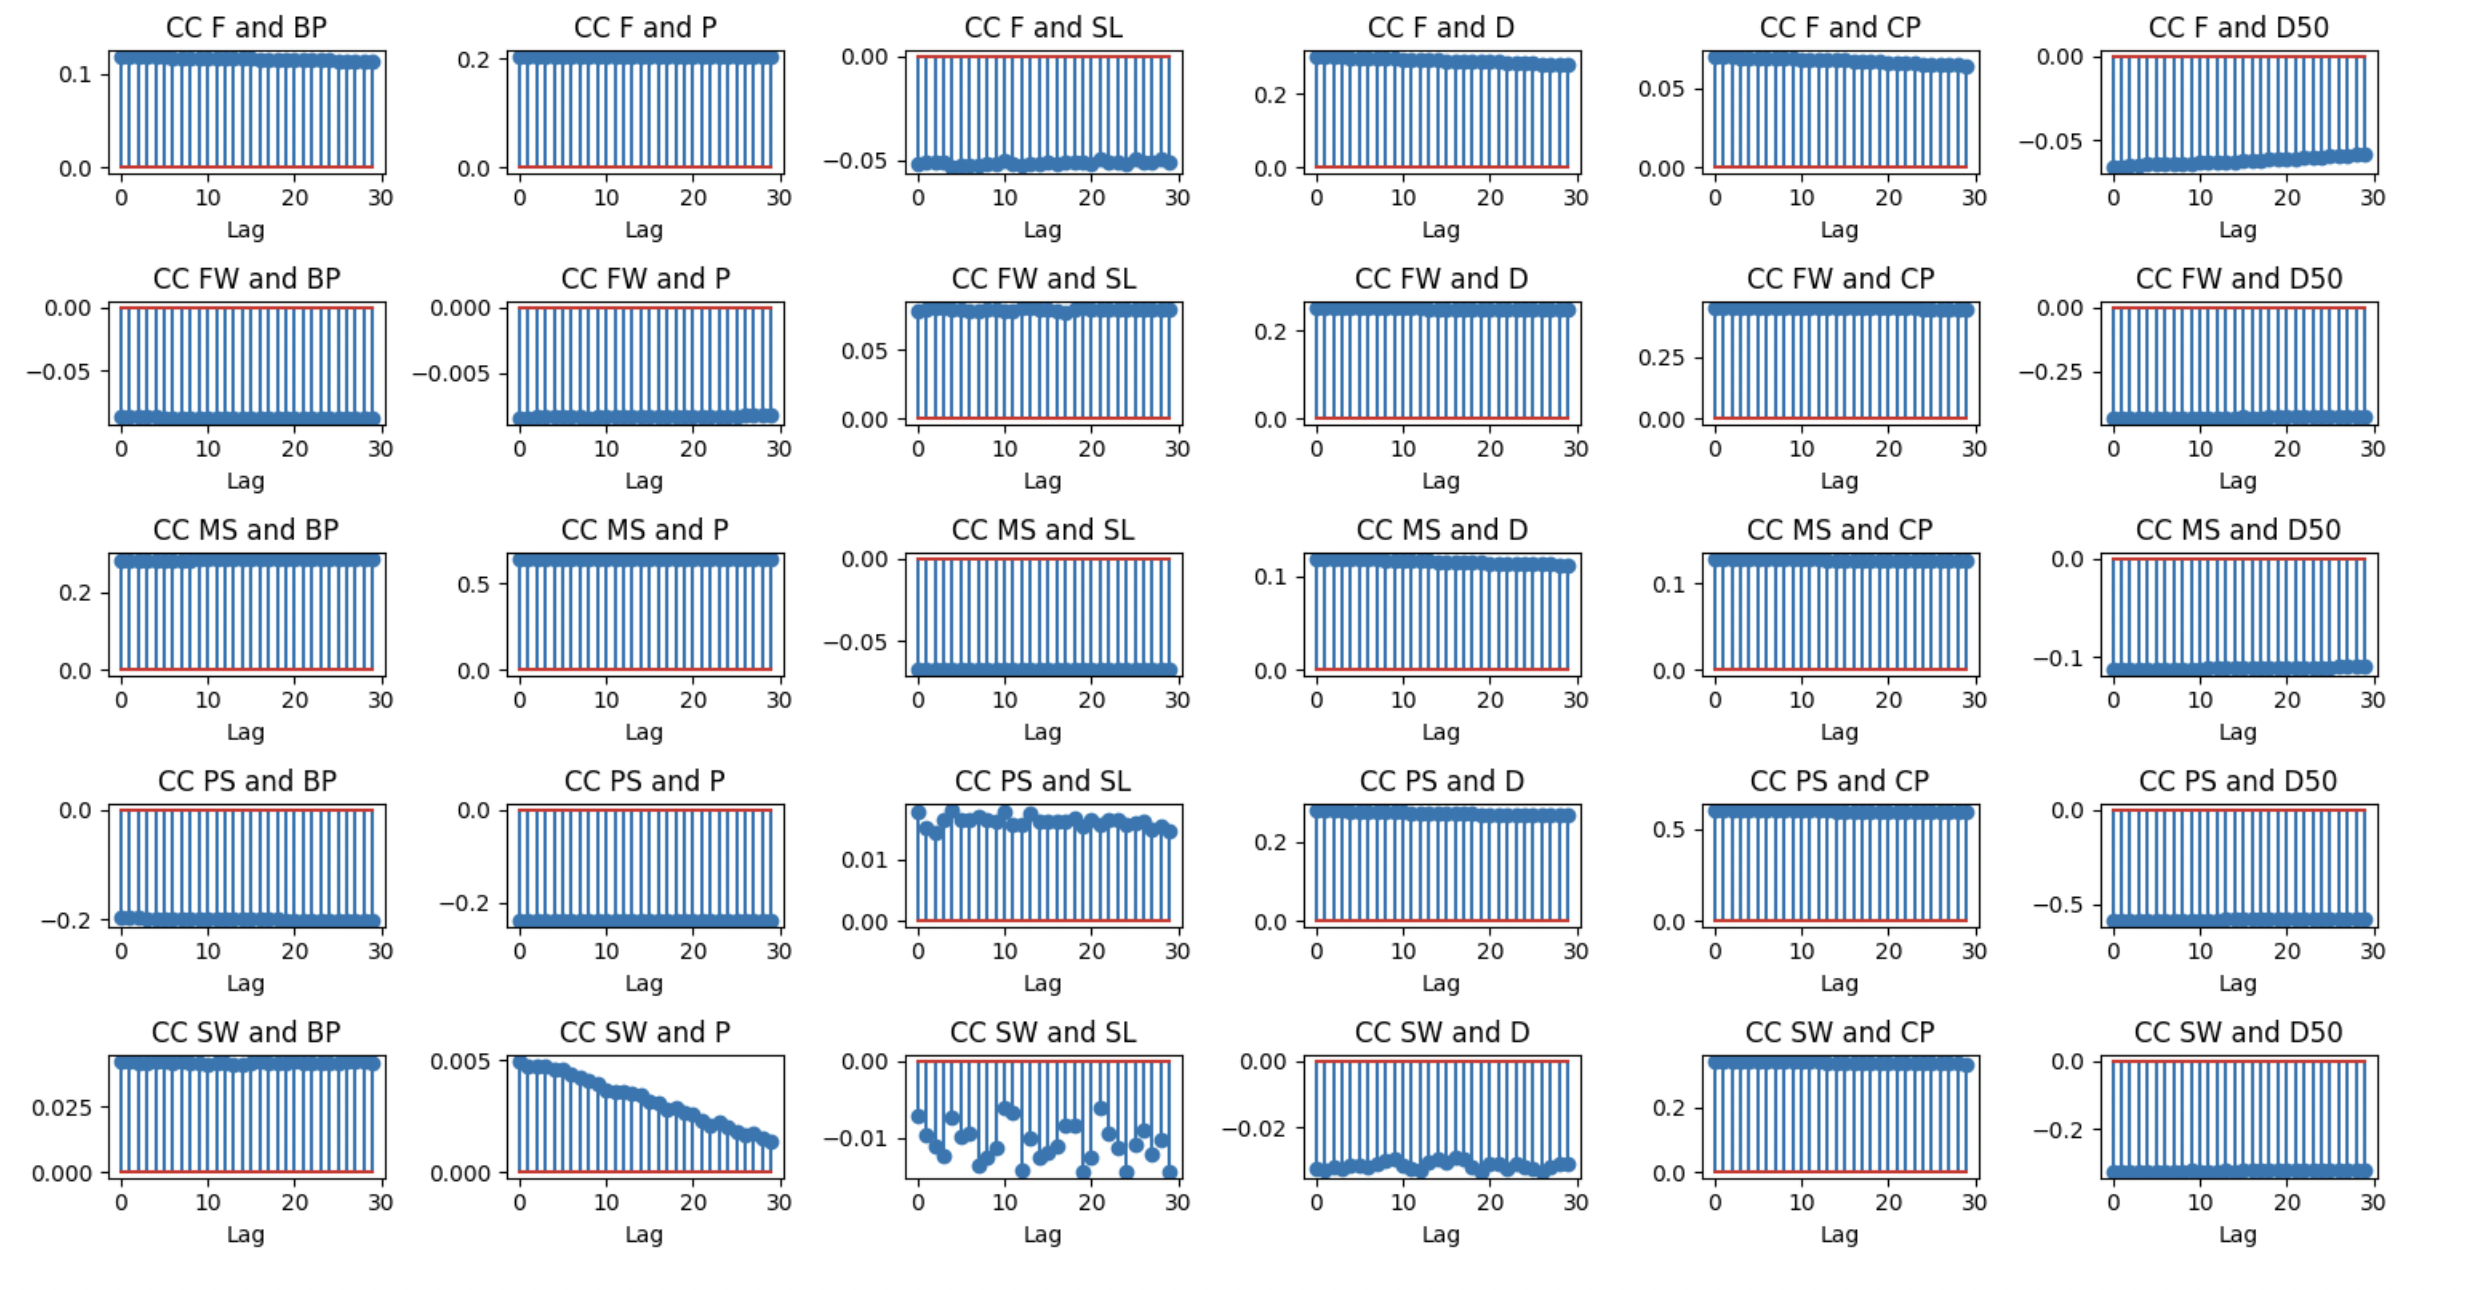
#alpha 0.4 to 15
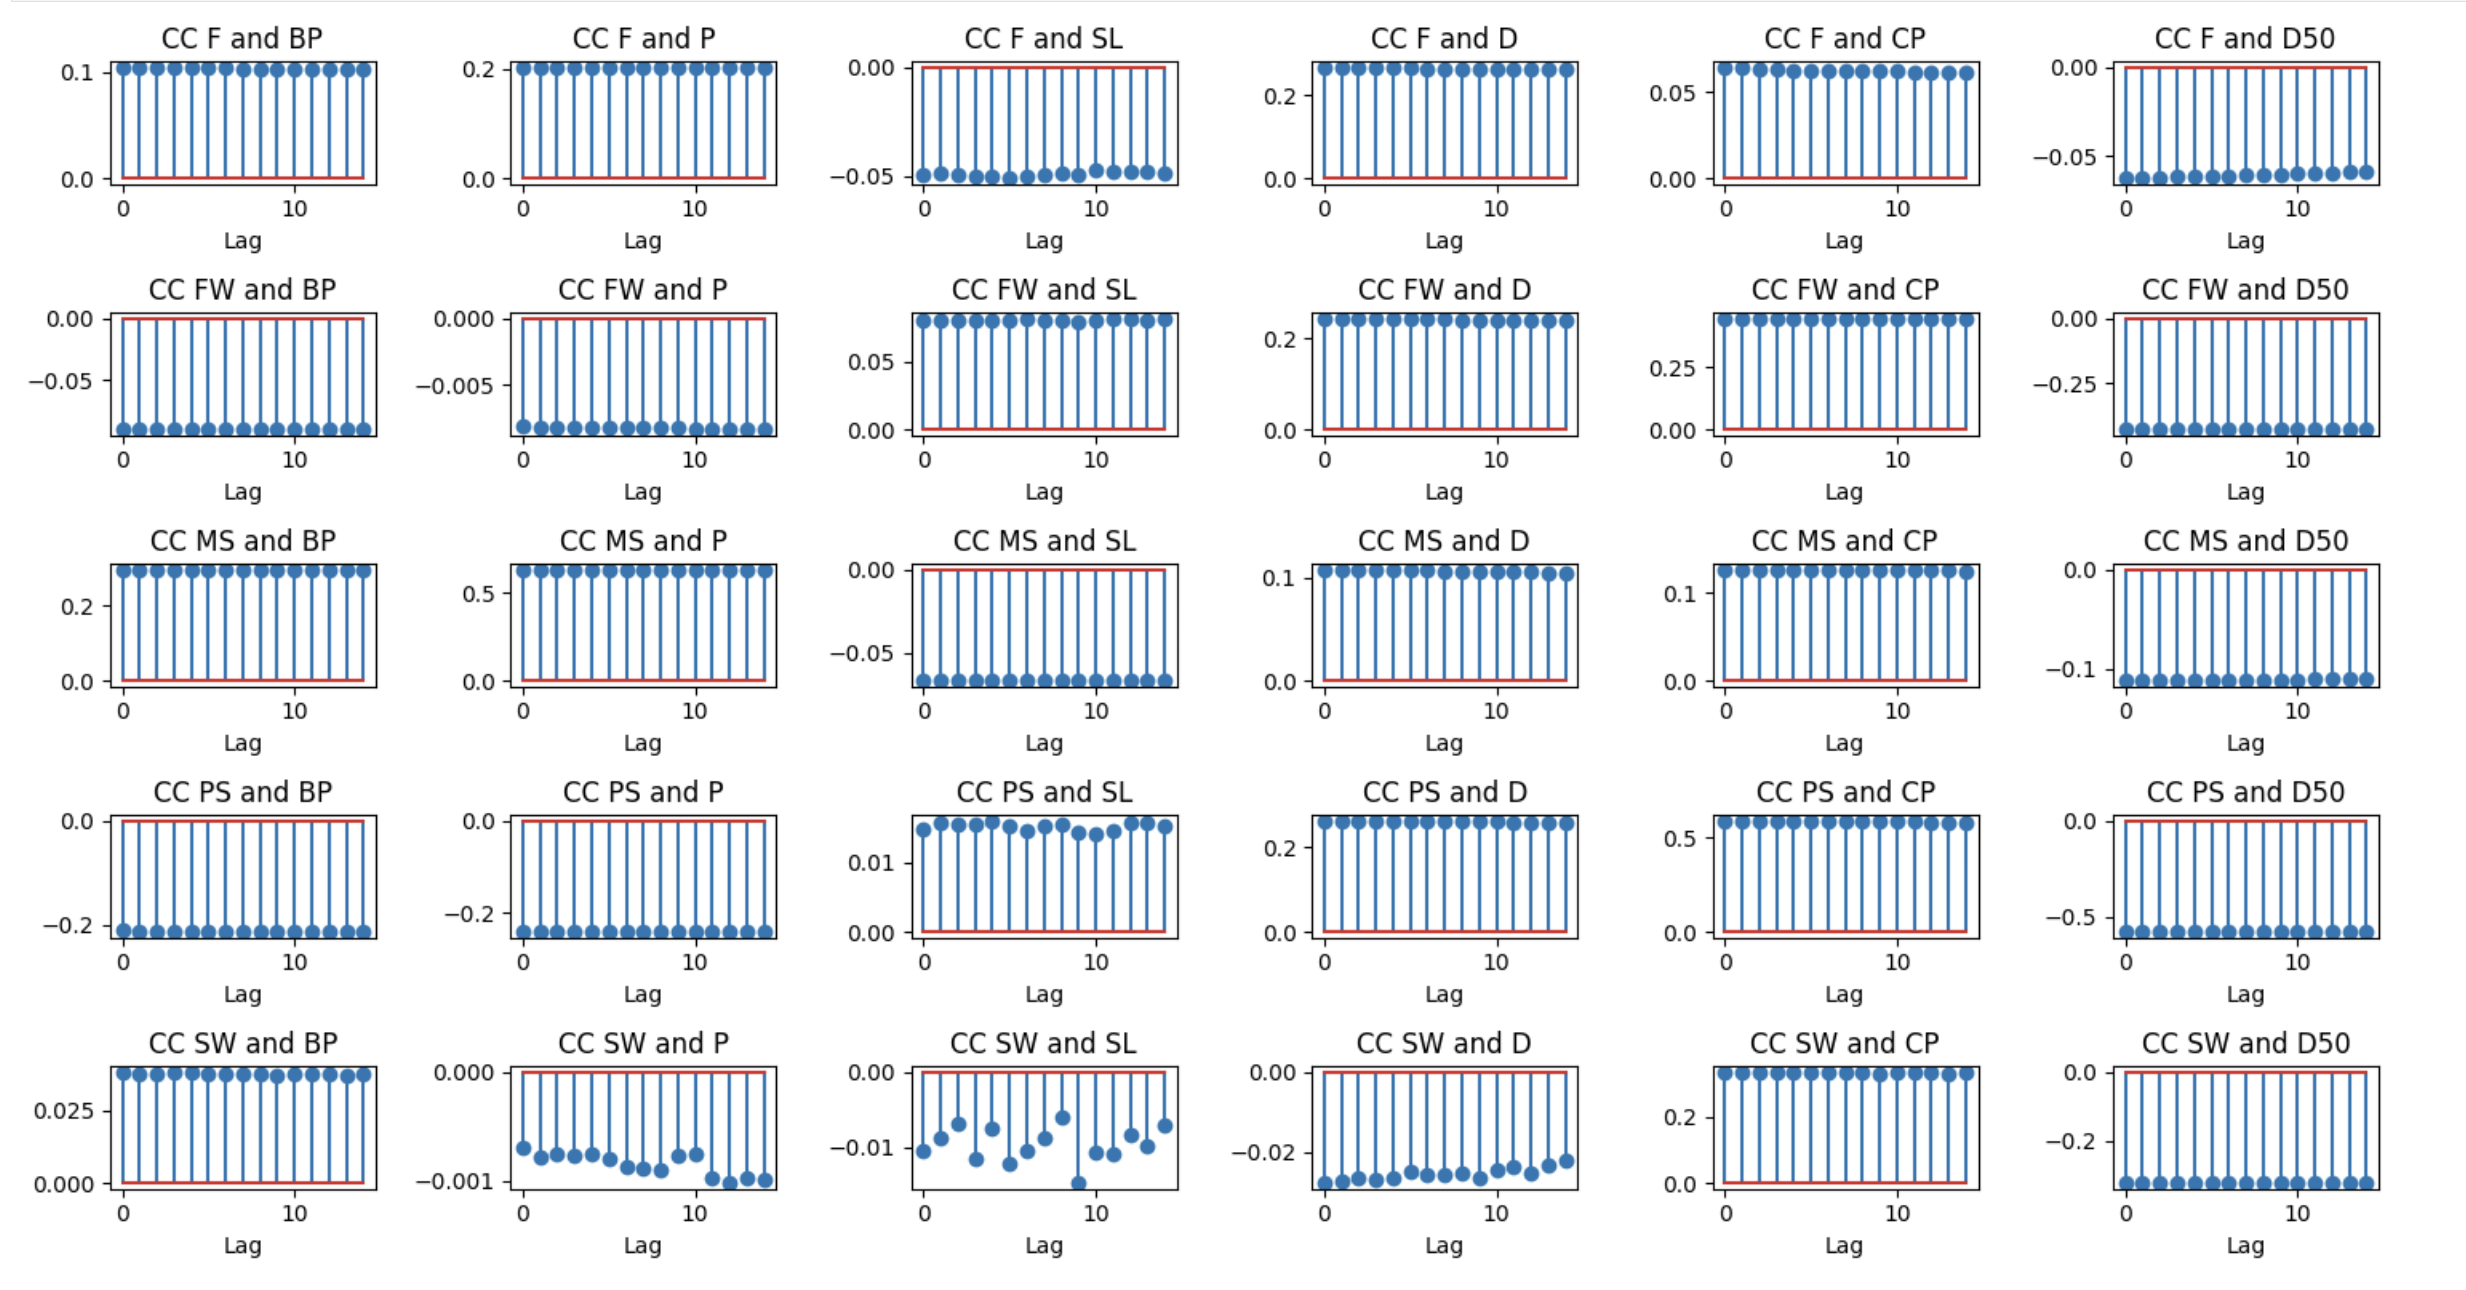
#normal to 15
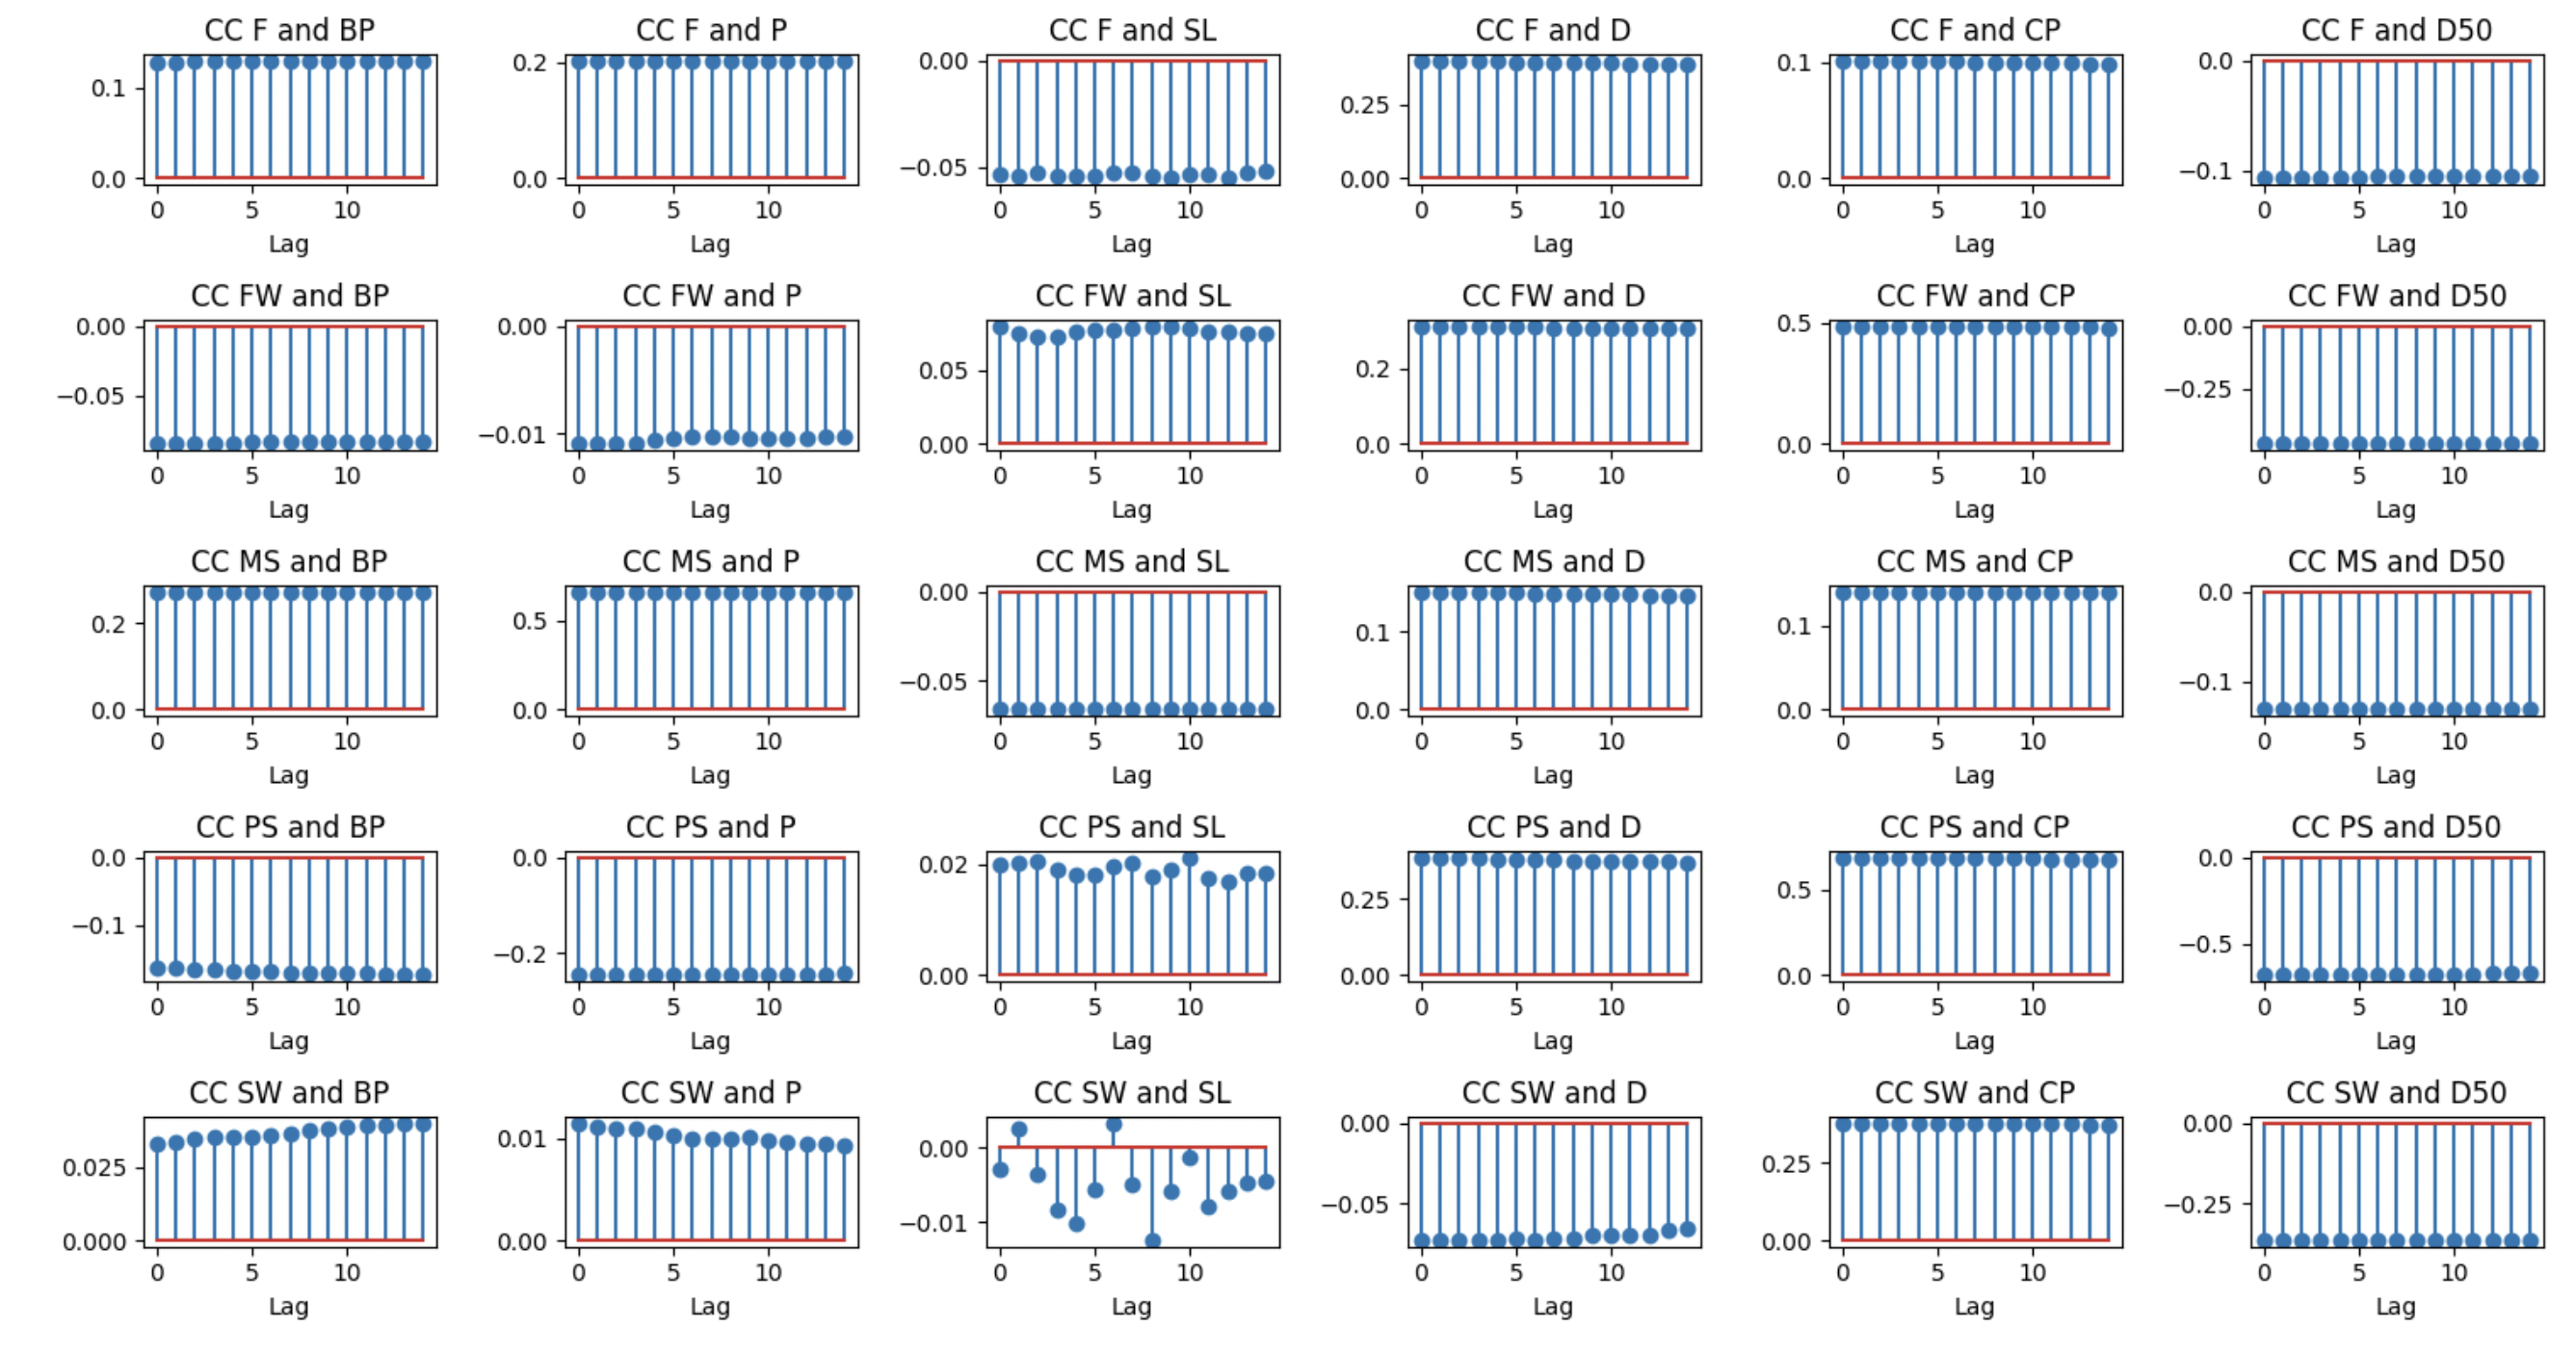


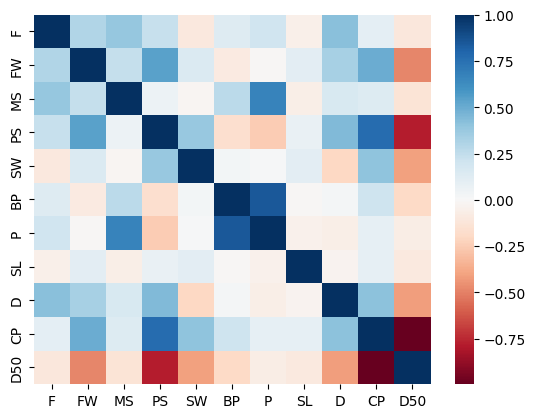

In [127]:

sns.heatmap(df.corr(),cmap='RdBu')
plt.show()

In [95]:
x.shape[1]
#df.head()
# dfm=(df-df.min())/df.max()
# dfm.head()
#np.corrcoef(dfm['CP'],dfm['D50'])[0,1]

5

In [70]:
>>> import numpy as np
>>> from scipy import signal
>>> import matplotlib.pyplot as plt
>>> rng = np.random.default_rng()

>>> sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
>>> sig_noise = sig + rng.standard_normal(len(sig))
>>> corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

>>> clock = np.arange(64, len(sig), 128)
>>> fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
>>> ax_orig.plot(sig)
>>> ax_orig.plot(clock, sig[clock], 'ro')
>>> ax_orig.set_title('Original signal')
>>> ax_noise.plot(sig_noise)
>>> ax_noise.set_title('Signal with noise')
>>> ax_corr.plot(corr)
>>> ax_corr.plot(clock, corr[clock], 'ro')
>>> ax_corr.axhline(0.5, ls=':')
>>> ax_corr.set_title('Cross-correlated with rectangular pulse')
>>> ax_orig.margins(0, 0.1)
>>> fig.tight_layout()
>>> plt.show()

Compute the cross-correlation of a noisy signal with the original signal.

>>> x = np.arange(128) / 128
>>> sig = np.sin(2 * np.pi * x)
>>> sig_noise = sig + rng.standard_normal(len(sig))
>>> corr = signal.correlate(sig_noise, sig)
>>> lags = signal.correlation_lags(len(sig), len(sig_noise))
>>> corr /= np.max(corr)

>>> fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
>>> ax_orig.plot(sig)
>>> ax_orig.set_title('Original signal')
>>> ax_orig.set_xlabel('Sample Number')
>>> ax_noise.plot(sig_noise)
>>> ax_noise.set_title('Signal with noise')
>>> ax_noise.set_xlabel('Sample Number')
>>> ax_corr.plot(lags, corr)
>>> ax_corr.set_title('Cross-correlated signal')
>>> ax_corr.set_xlabel('Lag')
>>> ax_orig.margins(0, 0.1)
>>> ax_noise.margins(0, 0.1)
>>> ax_corr.margins(0, 0.1)
>>> fig.tight_layout()
>>> plt.show()

SyntaxError: invalid syntax (<ipython-input-70-46e9900b2a5b>, line 25)